# ML2 2.4 - Evaluating Hyperparameters

### The script contains the following:

#### 1. Importing Libraries and Data
#### 2. Cleaning Data
#### 3. Random Forest Data (recreated)
#### 4. Grid/Random Search on Random Forest Data
#### 5. Bayesian search on Deep Learning Data
        Importing Libraries and Data
        Splitting Data, Running Bayesian Search
        Re-running RNN and Creating Confusion Matrix
#### 6. Export

### 1. Importing Libraries and Data

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [16]:
# Loading climate weather data from the Random Forest Task (2.3)

climate = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning\ClimateWins\Unsupervised Learning\ML2_2.3_Climate.csv')

In [18]:
# Loading pleasant prediction data from the Random Forest Task (2.3)
pleasant = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning\ClimateWins\Unsupervised Learning\ML2_2.3_Pleasant.csv')

In [20]:
# Creating Path for exporting files at the end

path = r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning'

In [22]:
path

'D:\\Career Foundry\\3) Data Specialization\\Machine Learning with Python\\Achievement 2 - Real-World Application of Machine Learning'

### 2. Cleaning Data

In [25]:
clist = climate.columns.tolist()

In [27]:
clist

['Unnamed: 0',
 'DATE',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 

##### It appears we have an additional columns called Unnamed: 0. That will need to be removed. Our other columns include DATE, BASEL, BELGRADE, BUDAPEST, DEBILT, DUSSELDORF, HEATHROW, KASSEL, LJUBLJANA, MAASTRICHT, MADRID, MUNCHENB, OSLO, SONNBLICK, STOCKHOLM AND VALENTIA. All the previous work of dropping certain weather stations with limited data and filling the gaps of the existing weather station observations with their closest weather station is all complete.

In [30]:
climate.head()

Unnamed: 0      DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0  19600101                  7            0.85           1.018   
1           1  19600102                  6            0.84           1.018   
2           2  19600103                  8            0.90           1.018   
3           3  19600104                  3            0.92           1.018   
4           4  19600105                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0              6.5             0.8  ...                 4.9   
1              6.1             3.3  ...                 5.0   
2              8.5             5.1  ...                 4.1   
3              6.3             3.8  ...                 2.3   
4              3.0            -0.7  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 137 columns]

In [32]:
climate_drop = climate.drop(columns=['Unnamed: 0'])

In [34]:
climate_drop

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101                  7            0.85          1.0180   
1      19600102                  6            0.84          1.0180   
2      19600103                  8            0.90          1.0180   
3      19600104                  3            0.92          1.0180   
4      19600105                  6            0.95          1.0180   
...         ...                ...             ...             ...   
22945  20221027                  1            0.79          1.0248   
22946  20221028                  6            0.77          1.0244   
22947  20221029                  4            0.76          1.0227   
22948  20221030                  5            0.80          1.0212   
22949  20221031                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                  6.5             0.8            10.9  ...   
1                  6.1             3.3            10.1  ...   
2                  8.5             5.1             9.9  ...   
3                  6.3             3.8            10.6  ...   
4                  3.0            -0.7             6.0  ...   
...                ...             ...             ...  ...   
22945             15.9            11.4            21.4  ...   
22946             16.7            14.3            21.9  ...   
22947             16.7            13.1            22.4  ...   
22948             15.4            11.6            21.1  ...   
22949             13.5             9.9            19.2  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                     4.9                     5               0.88   
1                     5.0                     7               0.91   
2                     4.1                     7               0.91   
3                     2.3                     7               0.86   
4                     4.3                     3               0.80   
...                   ...                   ...                ...   
22945                14.2                     5               0.82   
22946                14.3                     5               0.82   
22947                14.4                     5               0.82   
22948                12.4                     5               0.82   
22949                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142                       1.13                    0.41   
22946             1.0142                       1.13                    0.41   
22947             1.

In [36]:
plist = pleasant.columns.tolist()

In [38]:
plist

['Unnamed: 0',
 'DATE',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

In [40]:
pleasant_drop = pleasant.drop(columns=['Unnamed: 0'])

In [42]:
pleasant_drop

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [44]:
climate_drop.shape

(22950, 136)

In [46]:
pleasant_drop.shape

(22950, 16)

##### We have the DATE column attached to our pleasant prediction data also. Right now we have all the data we need to begin our Grid or Random Search for our Random Forest data.

### 3. Random Forest Data (recreated)

##### First I'll reacreated my data set that only selected a single decade involving the 1960s.

In [51]:
climate_1960s = climate_drop[climate_drop['DATE'].astype(str).str.contains('196')]

In [53]:
climate_1960s

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0     19600101                  7            0.85           1.018   
1     19600102                  6            0.84           1.018   
2     19600103                  8            0.90           1.018   
3     19600104                  3            0.92           1.018   
4     19600105                  6            0.95           1.018   
...        ...                ...             ...             ...   
3648  19691227                  8            0.80           1.018   
3649  19691228                  8            0.83           1.018   
3650  19691229                  5            0.82           1.018   
3651  19691230                  8            0.83           1.018   
3652  19691231                  8            0.80           1.018   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                       0.32                 0.09             0.7   
1                       0.36                 1.05             1.1   
2                       0.18                 0.30             0.0   
3                       0.58                 0.00             4.1   
4                       0.65                 0.14             5.4   
...                      ...                  ...             ...   
3648                    0.18                 0.00             0.0   
3649                    0.18                 0.00             0.0   
3650                    0.67                 0.00             6.5   
3651                    0.18                 0.00             0.0   
3652                    0.18                 0.00             0.0   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                 6.5             0.8            10.9  ...   
1                 6.1             3.3            10.1  ...   
2                 8.5             5.1             9.9  ...   
3                 6.3             3.8            10.6  ...   
4                 3.0            -0.7             6.0  ...   
...               ...             ...             ...  ...   
3648             -3.1            -5.0            -2.2  ...   
3649             -3.5            -4.0            -2.2  ...   
3650             -3.7            -4.7            -1.7  ...   
3651             -3.9            -6.1            -2.9  ...   
3652             -3.1            -3.7            -2.5  ...   

      STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                    4.9                     5               0.88   
1                    5.0                     7               0.91   
2                    4.1                     7               0.91   
3                    2.3                     7               0.86   
4                    4.3                     3               0.80   
...                  ...                   ...                ...   
3648                 0.7                     6               0.84   
3649                 1.7                     6               0.73   
3650                 1.8                     7               0.74   
3651                -2.7                     5               0.70   
3652                -3.6                     6               0.71   

      VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                1.0003                       0.45                    0.34   
1                1.0007                       0.25                    0.84   
2                1.0096                       0.17                    0.08   
3                1.0184                       0.13                    0.98   
4                1.0328                       0.46                    0.00   
...                 ...                        ...                     ...   
3648             1.0239                       0.24                    0.00   
3649             1.0044                       0.33                    0.01   
3650             0.9972                       0.12                    0.00  

In [55]:
pleasant_1960s = pleasant_drop[pleasant_drop['DATE'].astype(str).str.contains('196')]

In [57]:
pleasant_1960s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0     19600101                       0                          0   
1     19600102                       0                          0   
2     19600103                       0                          0   
3     19600104                       0                          0   
4     19600105                       0                          0   
...        ...                     ...                        ...   
3648  19691227                       0                          0   
3649  19691228                       0                          0   
3650  19691229                       0                          0   
3651  19691230                       0                          0   
3652  19691231                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
3648                          0                        0   
3649                          0                        0   
3650                          0                        0   
3651                          0                        0   
3652                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
3648                            0                          0   
3649                            0                          0   
3650                            0                          0   
3651                            0                          0   
3652                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
3648                        0                           0   
3649                        0                           0   
3650                        0                           0   
3651                        0                           0   
3652                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
3648                            0                        0   
3649                            0                        0   
3650                            0                        0   
3651                            0                        0   
3652                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                             0                      0   
1                             0                      0   
2                             0        

In [59]:
# Create an 'X' matrix

X = climate_1960s
y = pleasant_1960s

In [61]:
X

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0     19600101                  7            0.85           1.018   
1     19600102                  6            0.84           1.018   
2     19600103                  8            0.90           1.018   
3     19600104                  3            0.92           1.018   
4     19600105                  6            0.95           1.018   
...        ...                ...             ...             ...   
3648  19691227                  8            0.80           1.018   
3649  19691228                  8            0.83           1.018   
3650  19691229                  5            0.82           1.018   
3651  19691230                  8            0.83           1.018   
3652  19691231                  8            0.80           1.018   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                       0.32                 0.09             0.7   
1                       0.36                 1.05             1.1   
2                       0.18                 0.30             0.0   
3                       0.58                 0.00             4.1   
4                       0.65                 0.14             5.4   
...                      ...                  ...             ...   
3648                    0.18                 0.00             0.0   
3649                    0.18                 0.00             0.0   
3650                    0.67                 0.00             6.5   
3651                    0.18                 0.00             0.0   
3652                    0.18                 0.00             0.0   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                 6.5             0.8            10.9  ...   
1                 6.1             3.3            10.1  ...   
2                 8.5             5.1             9.9  ...   
3                 6.3             3.8            10.6  ...   
4                 3.0            -0.7             6.0  ...   
...               ...             ...             ...  ...   
3648             -3.1            -5.0            -2.2  ...   
3649             -3.5            -4.0            -2.2  ...   
3650             -3.7            -4.7            -1.7  ...   
3651             -3.9            -6.1            -2.9  ...   
3652             -3.1            -3.7            -2.5  ...   

      STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                    4.9                     5               0.88   
1                    5.0                     7               0.91   
2                    4.1                     7               0.91   
3                    2.3                     7               0.86   
4                    4.3                     3               0.80   
...                  ...                   ...                ...   
3648                 0.7                     6               0.84   
3649                 1.7                     6               0.73   
3650                 1.8                     7               0.74   
3651                -2.7                     5               0.70   
3652                -3.6                     6               0.71   

      VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                1.0003                       0.45                    0.34   
1                1.0007                       0.25                    0.84   
2                1.0096                       0.17                    0.08   
3                1.0184                       0.13                    0.98   
4                1.0328                       0.46                    0.00   
...                 ...                        ...                     ...   
3648             1.0239                       0.24                    0.00   
3649             1.0044                       0.33                    0.01   
3650             0.9972                       0.12                    0.00  

In [63]:
y

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0     19600101                       0                          0   
1     19600102                       0                          0   
2     19600103                       0                          0   
3     19600104                       0                          0   
4     19600105                       0                          0   
...        ...                     ...                        ...   
3648  19691227                       0                          0   
3649  19691228                       0                          0   
3650  19691229                       0                          0   
3651  19691230                       0                          0   
3652  19691231                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
3648                          0                        0   
3649                          0                        0   
3650                          0                        0   
3651                          0                        0   
3652                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
3648                            0                          0   
3649                            0                          0   
3650                            0                          0   
3651                            0                          0   
3652                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
3648                        0                           0   
3649                        0                           0   
3650                        0                           0   
3651                        0                           0   
3652                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
3648                            0                        0   
3649                            0                        0   
3650                            0                        0   
3651                            0                        0   
3652                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                             0                      0   
1                             0                      0   
2                             0        

In [65]:
# I'll drop the DATE column from X and y to allow the Random Forest to work with the data better.

X = X.drop(columns=['DATE'])

In [67]:
y = y.drop(columns=['DATE'])

In [69]:
X

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                     7            0.85           1.018   
1                     6            0.84           1.018   
2                     8            0.90           1.018   
3                     3            0.92           1.018   
4                     6            0.95           1.018   
...                 ...             ...             ...   
3648                  8            0.80           1.018   
3649                  8            0.83           1.018   
3650                  5            0.82           1.018   
3651                  8            0.83           1.018   
3652                  8            0.80           1.018   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                       0.32                 0.09             0.7   
1                       0.36                 1.05             1.1   
2                       0.18                 0.30             0.0   
3                       0.58                 0.00             4.1   
4                       0.65                 0.14             5.4   
...                      ...                  ...             ...   
3648                    0.18                 0.00             0.0   
3649                    0.18                 0.00             0.0   
3650                    0.67                 0.00             6.5   
3651                    0.18                 0.00             0.0   
3652                    0.18                 0.00             0.0   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                 6.5             0.8            10.9                     1   
1                 6.1             3.3            10.1                     6   
2                 8.5             5.1             9.9                     6   
3                 6.3             3.8            10.6                     8   
4                 3.0            -0.7             6.0                     8   
...               ...             ...             ...                   ...   
3648             -3.1            -5.0            -2.2                     8   
3649             -3.5            -4.0            -2.2                     8   
3650             -3.7            -4.7            -1.7                     8   
3651             -3.9            -6.1            -2.9                     8   
3652             -3.1            -3.7            -2.5                     8   

      ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0     ...                 4.9                     5               0.88   
1     ...                 5.0                     7               0.91   
2     ...                 4.1                     7               0.91   
3     ...                 2.3                     7               0.86   
4     ...                 4.3                     3               0.80   
...   ...                 ...                   ...                ...   
3648  ...                 0.7                     6               0.84   
3649  ...                 1.7                     6               0.73   
3650  ...                 1.8                     7               0.74   
3651  ...                -2.7                     5               0.70   
3652  ...                -3.6                     6               0.71   

      VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                1.0003                       0.45                    0.34   
1                1.0007                       0.25                    0.84   
2                1.0096                       0.17                    0.08   
3                1.0184                       0.13                    0.98   
4                1.0328                       0.46                    0.00   
...                 ...                        ...                     ...   
3648             1.0239                       0.24                    0.00   
3649  

In [71]:
y

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
...                      ...                        ...   
3648                       0                          0   
3649                       0                          0   
3650                       0                          0   
3651                       0                          0   
3652                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
3648                          0                        0   
3649                          0                        0   
3650                          0                        0   
3651                          0                        0   
3652                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
3648                            0                          0   
3649                            0                          0   
3650                            0                          0   
3651                            0                          0   
3652                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
3648                        0                           0   
3649                        0                           0   
3650                        0                           0   
3651                        0                           0   
3652                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
3648                            0                        0   
3649                            0                        0   
3650                            0                        0   
3651                            0                        0   
3652                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0        

In [73]:
# Changing data from DataFrame to Numpy Array

X = np.array(X.iloc[:,X.columns!=135])
y = np.array(y)

In [75]:
X

array([[ 7.   ,  0.85 ,  1.018, ...,  8.5  ,  6.   , 10.9  ],
       [ 6.   ,  0.84 ,  1.018, ...,  8.9  ,  5.6  , 12.1  ],
       [ 8.   ,  0.9  ,  1.018, ..., 10.5  ,  8.1  , 12.9  ],
       ...,
       [ 5.   ,  0.82 ,  1.018, ...,  3.8  ,  2.5  ,  6.3  ],
       [ 8.   ,  0.83 ,  1.018, ...,  2.9  ,  1.2  ,  5.1  ],
       [ 8.   ,  0.8  ,  1.018, ...,  2.4  ,  1.5  ,  3.6  ]])

In [77]:
X.shape

(3653, 135)

In [79]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
y.shape

(3653, 15)

In [87]:
# Train & Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [89]:
# Train and Test Split Shapes

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922, 15)
(731, 135) (731, 15)


##### Second I'll recreate 1 of the data sets that had all the years but only a single weather station. I'll be using DUSSELDORF as my single weather station with all the year data.

In [92]:
climate_dusseldorf = climate_drop.drop(columns =['DATE',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_cloud_cover',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_pressure',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_humidity',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'])

In [94]:
pleasant_dusseldorf = pleasant_drop.drop(columns = ['DATE',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather'])

In [96]:
climate_dusseldorf.shape

(22950, 9)

In [98]:
pleasant_dusseldorf.shape

(22950, 1)

In [100]:
# Create an 'X' matrix for Kassel RF

D = climate_dusseldorf
dd = pleasant_dusseldorf

In [102]:
D.shape

(22950, 9)

In [104]:
dd.shape

(22950, 1)

In [106]:
# Changing data from DataFrame to Numpy Array

D = np.array(D.iloc[:,D.columns!=135])
dd = np.array(dd)

In [108]:
D

array([[ 8.    ,  0.83  ,  1.0161, ..., 10.    ,  7.    , 11.5   ],
       [ 8.    ,  0.89  ,  1.0161, ...,  8.2   ,  7.4   , 11.    ],
       [ 7.    ,  0.95  ,  1.0161, ...,  7.1   ,  6.9   ,  9.1   ],
       ...,
       [ 8.    ,  0.73  ,  1.0196, ..., 18.2   , 13.4   , 22.    ],
       [ 7.    ,  0.73  ,  1.0176, ..., 16.7   , 11.9   , 21.1   ],
       [ 8.    ,  0.78  ,  1.0184, ..., 15.2   ,  9.7   , 19.5   ]])

In [110]:
dd

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [112]:
# Train & Test Split

D_train, D_test, dd_train, dd_test = train_test_split(D,dd,test_size=0.2)

In [114]:
# Train and Test Split Shapes

print(D_train.shape, dd_train.shape)
print(D_test.shape, dd_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


### 4. Grid/Random Search on Random Forest Data

##### Diving into the Random Forest data I'll use Random Search. Given that Random Search is a bit like Grid Search andn is more efficient at the risk of possibly missing an ideal combination, I feel this is the best option as the Random Forest is random and can change with each execution.

In [155]:
# Creating a RF Classifier for 1960s

clf = RandomForestClassifier()

#### This will be Random Search CV for the Single Decade Data with all Weather Stations.

In [158]:
# Random search CV

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [160]:
# RandomSearchCV of the single decade dataset

start = time.time()
rf_random = RandomizedSearchCV(clf, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.7306772589683532 minutes


In [162]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 60, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 360}
Best RANDOM search score is: 0.5325119780971936


In [164]:
# Creating a RF classifier with the best results from single decade dataset

clf = RandomForestClassifier(n_estimators = 410, max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# Fit function is used to train the model using the training sets as parameters

clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=2, min_samples_split=4,
                       n_estimators=410)

In [166]:
# Performing predictions on the single decade test dataset

y_pred = clf.predict(X_test)
  
# Using metrics module for accuracy calculation

print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.48700410396716826


In [194]:
feature_names = climate_1960s.columns.tolist()

In [196]:
feature_names

['DATE',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_tem

In [198]:
feature_name_d = climate_1960s.drop(columns=['DATE'])

In [200]:
features = feature_name_d.columns.tolist()

In [202]:
features

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


In [204]:
# Creating a list of features importance

important = pd.Series(clf.feature_importances_, index = features)
important

BASEL_cloud_cover         0.004966
BASEL_humidity            0.004146
BASEL_pressure            0.000000
BASEL_global_radiation    0.010299
BASEL_precipitation       0.007569
                            ...   
VALENTIA_precipitation    0.002920
VALENTIA_sunshine         0.003565
VALENTIA_temp_mean        0.007955
VALENTIA_temp_min         0.005188
VALENTIA_temp_max         0.015235
Length: 135, dtype: float64

In [206]:
pd.set_option('display.max_rows', 10)

In [208]:
# Looking at all the important features individually 

important.sort_values(ascending=False)

MAASTRICHT_temp_max     0.017759
DUSSELDORF_temp_max     0.017593
STOCKHOLM_temp_max      0.016796
LJUBLJANA_temp_max      0.016052
STOCKHOLM_temp_mean     0.015334
                          ...   
DUSSELDORF_pressure     0.000598
BUDAPEST_pressure       0.000000
BUDAPEST_cloud_cover    0.000000
BASEL_pressure          0.000000
BUDAPEST_humidity       0.000000
Length: 135, dtype: float64

##### It appears that the top important features are temp_max and temp_mean.

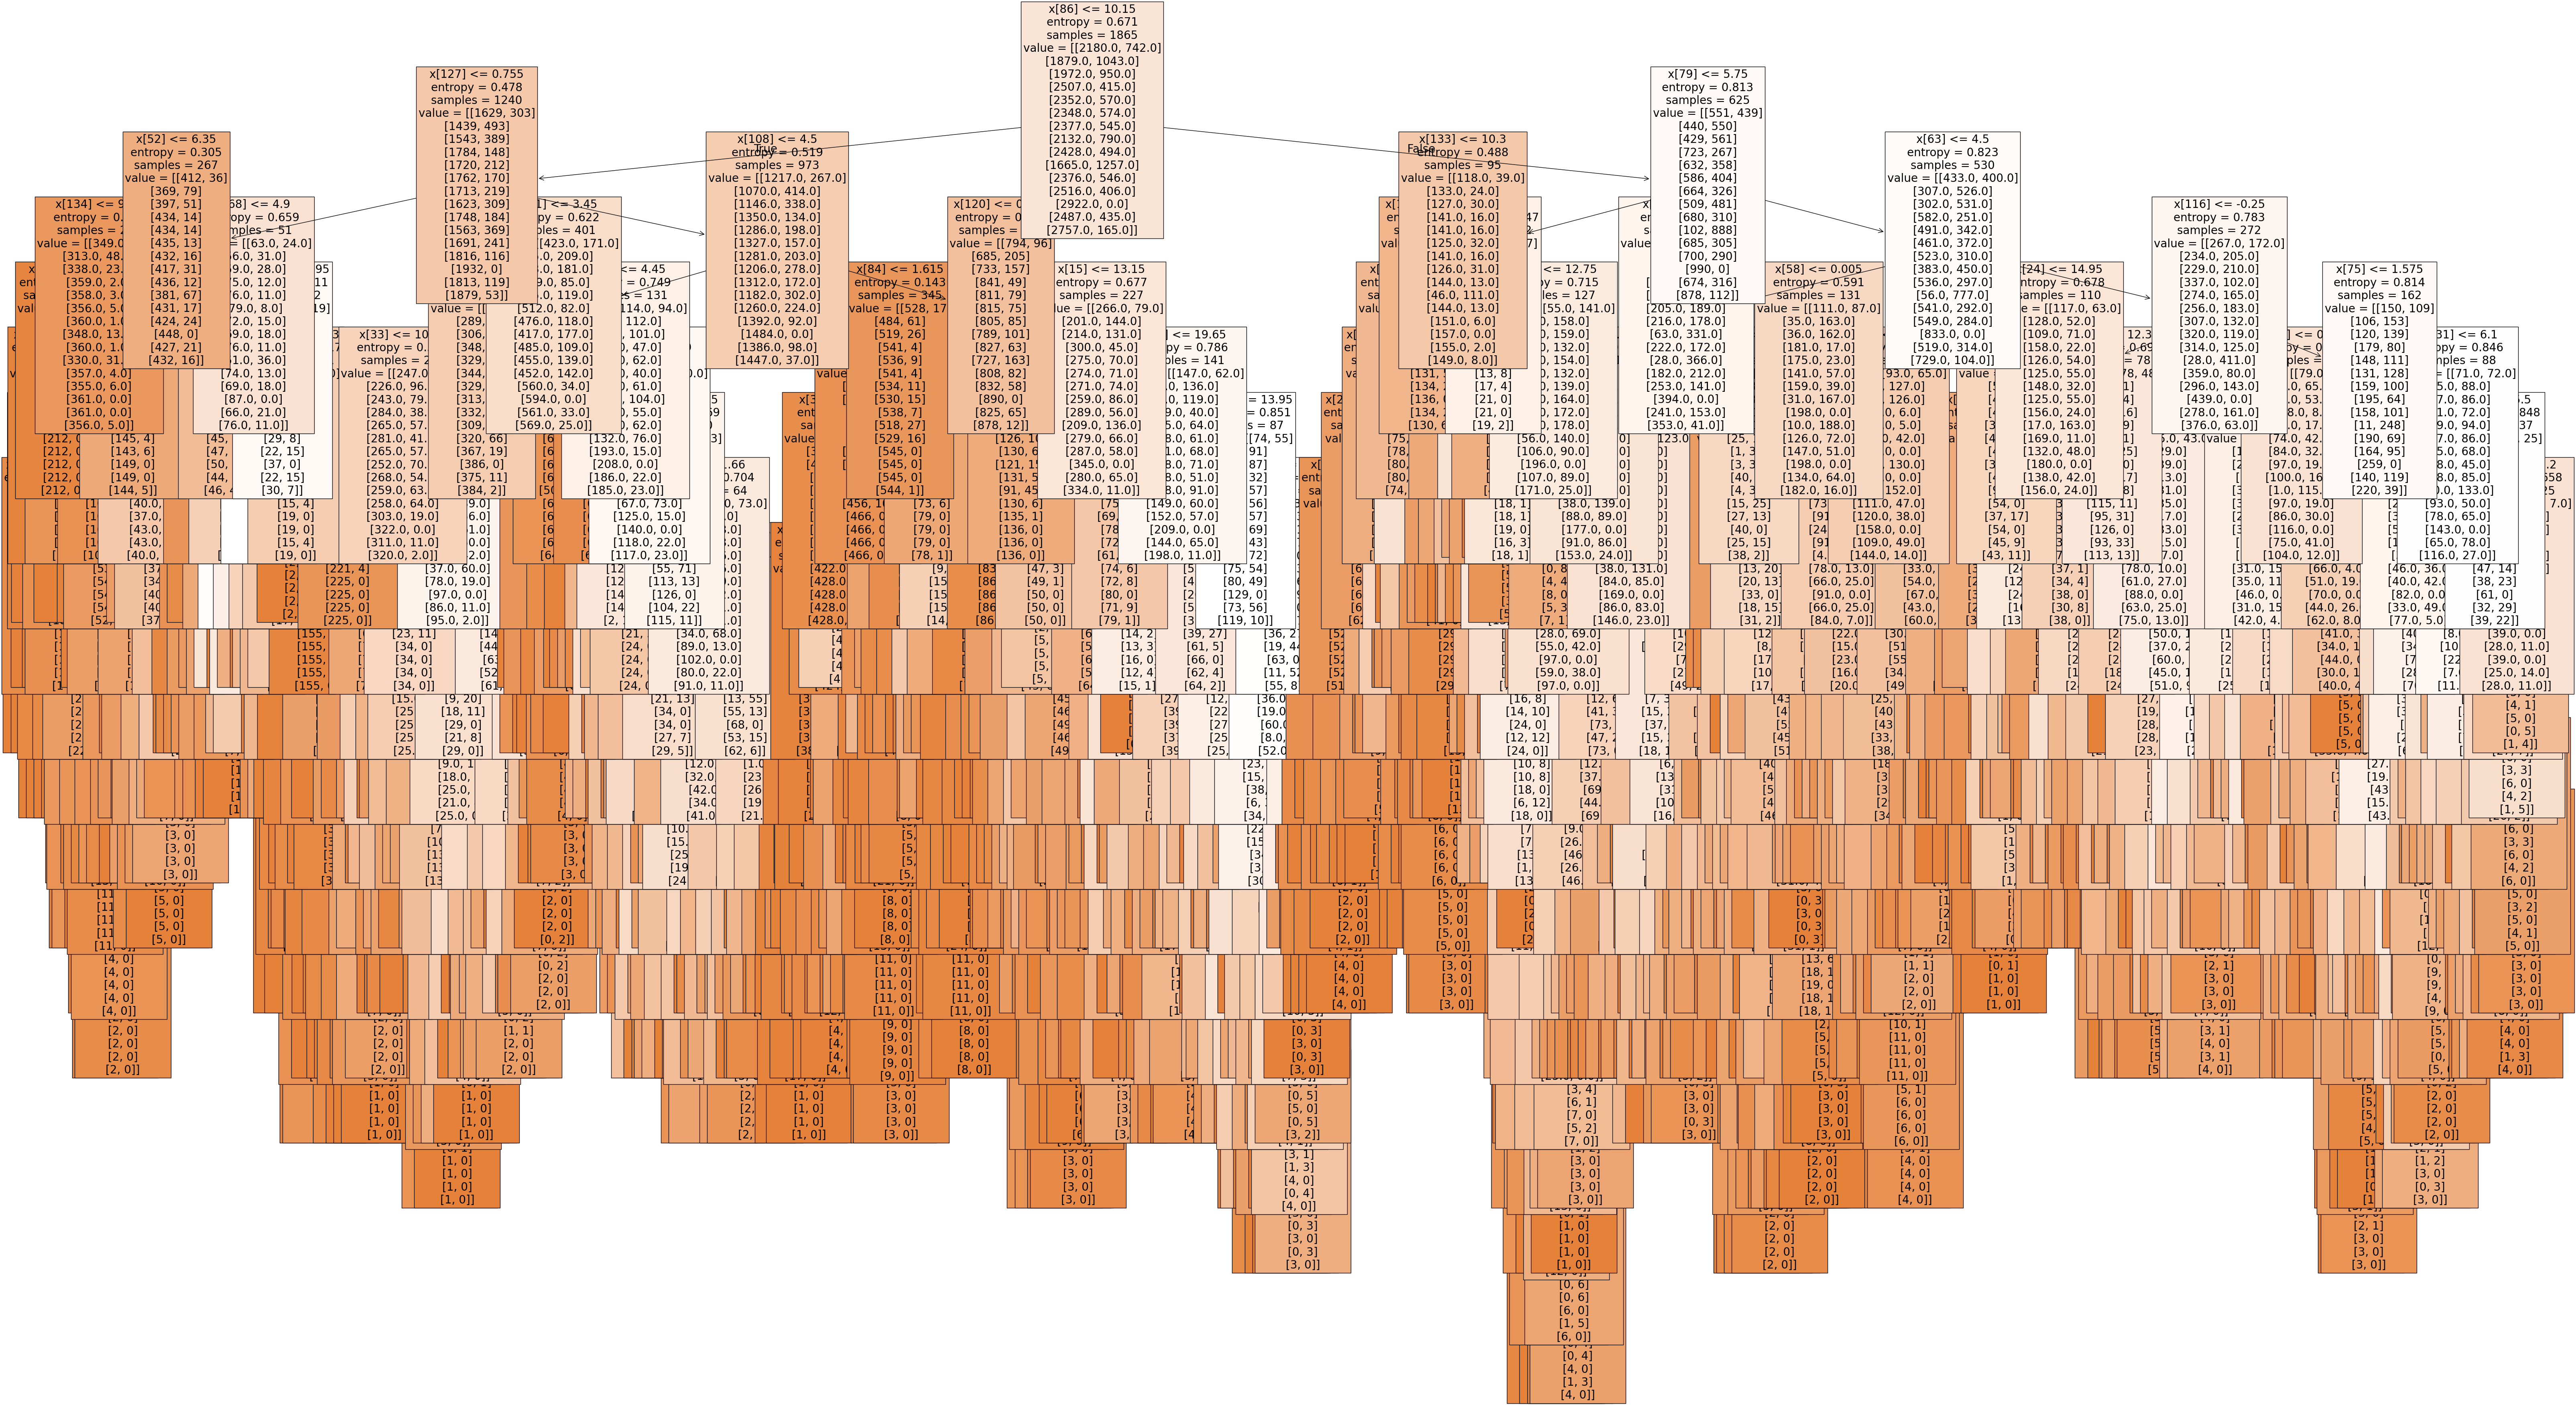

In [168]:
# Plotting the tree of the single decade dataset

types = {0:'unpleasant', 1:'pleasant'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=types, filled=True);
fig.savefig("Hyperparameter Random Forest_1960s.png")

##### This will be Random Search CV for the Single Weather Station DUSSELDORF and all years.

In [170]:
# Creating a RF Classifier for DUSSELDORF

clf2 = RandomForestClassifier()

In [172]:
# RandomSearchCV of the single weather station dataset

start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(D_train, dd_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


C:\Users\jmesi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Search took 0.7885206659634908 minutes


In [174]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 160}
Best RANDOM search score is: 1.0


In [176]:
# Creating a RF classifier with the best results from single weather station dataset

clf2 = RandomForestClassifier(n_estimators = 410, max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# Fit function is used to train the model using the training sets as parameters

clf2.fit(D_train, dd_train)

C:\Users\jmesi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_features=2, min_samples_split=4,
                       n_estimators=410)

In [177]:
# Performing predictions on the single weather station test dataset

dd_pred = clf2.predict(D_test)
  
# Using metrics module for accuracy calculation

print("Model Accuracy: ", metrics.accuracy_score(dd_test, dd_pred))

Model Accuracy:  1.0


In [211]:
feature_d_names = climate_dusseldorf.columns.tolist()

In [213]:
feature_d_names

['DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max']

In [215]:
features_d = feature_d_names

In [217]:
features_d

['DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max']

In [221]:
# Creating a list of features importance

important_d = pd.Series(clf2.feature_importances_, index = features_d)
important_d

DUSSELDORF_cloud_cover         0.030431
DUSSELDORF_humidity            0.029944
DUSSELDORF_pressure            0.015087
DUSSELDORF_global_radiation    0.083900
DUSSELDORF_precipitation       0.322879
DUSSELDORF_sunshine            0.081888
DUSSELDORF_temp_mean           0.127760
DUSSELDORF_temp_min            0.048493
DUSSELDORF_temp_max            0.259618
dtype: float64

In [223]:
# Looking at all the important features individually

important_d.sort_values(ascending=False)

DUSSELDORF_precipitation       0.322879
DUSSELDORF_temp_max            0.259618
DUSSELDORF_temp_mean           0.127760
DUSSELDORF_global_radiation    0.083900
DUSSELDORF_sunshine            0.081888
DUSSELDORF_temp_min            0.048493
DUSSELDORF_cloud_cover         0.030431
DUSSELDORF_humidity            0.029944
DUSSELDORF_pressure            0.015087
dtype: float64

##### It appears that for DUSSELDORF the top important features are precipitation, temp_max, and temp_mean.

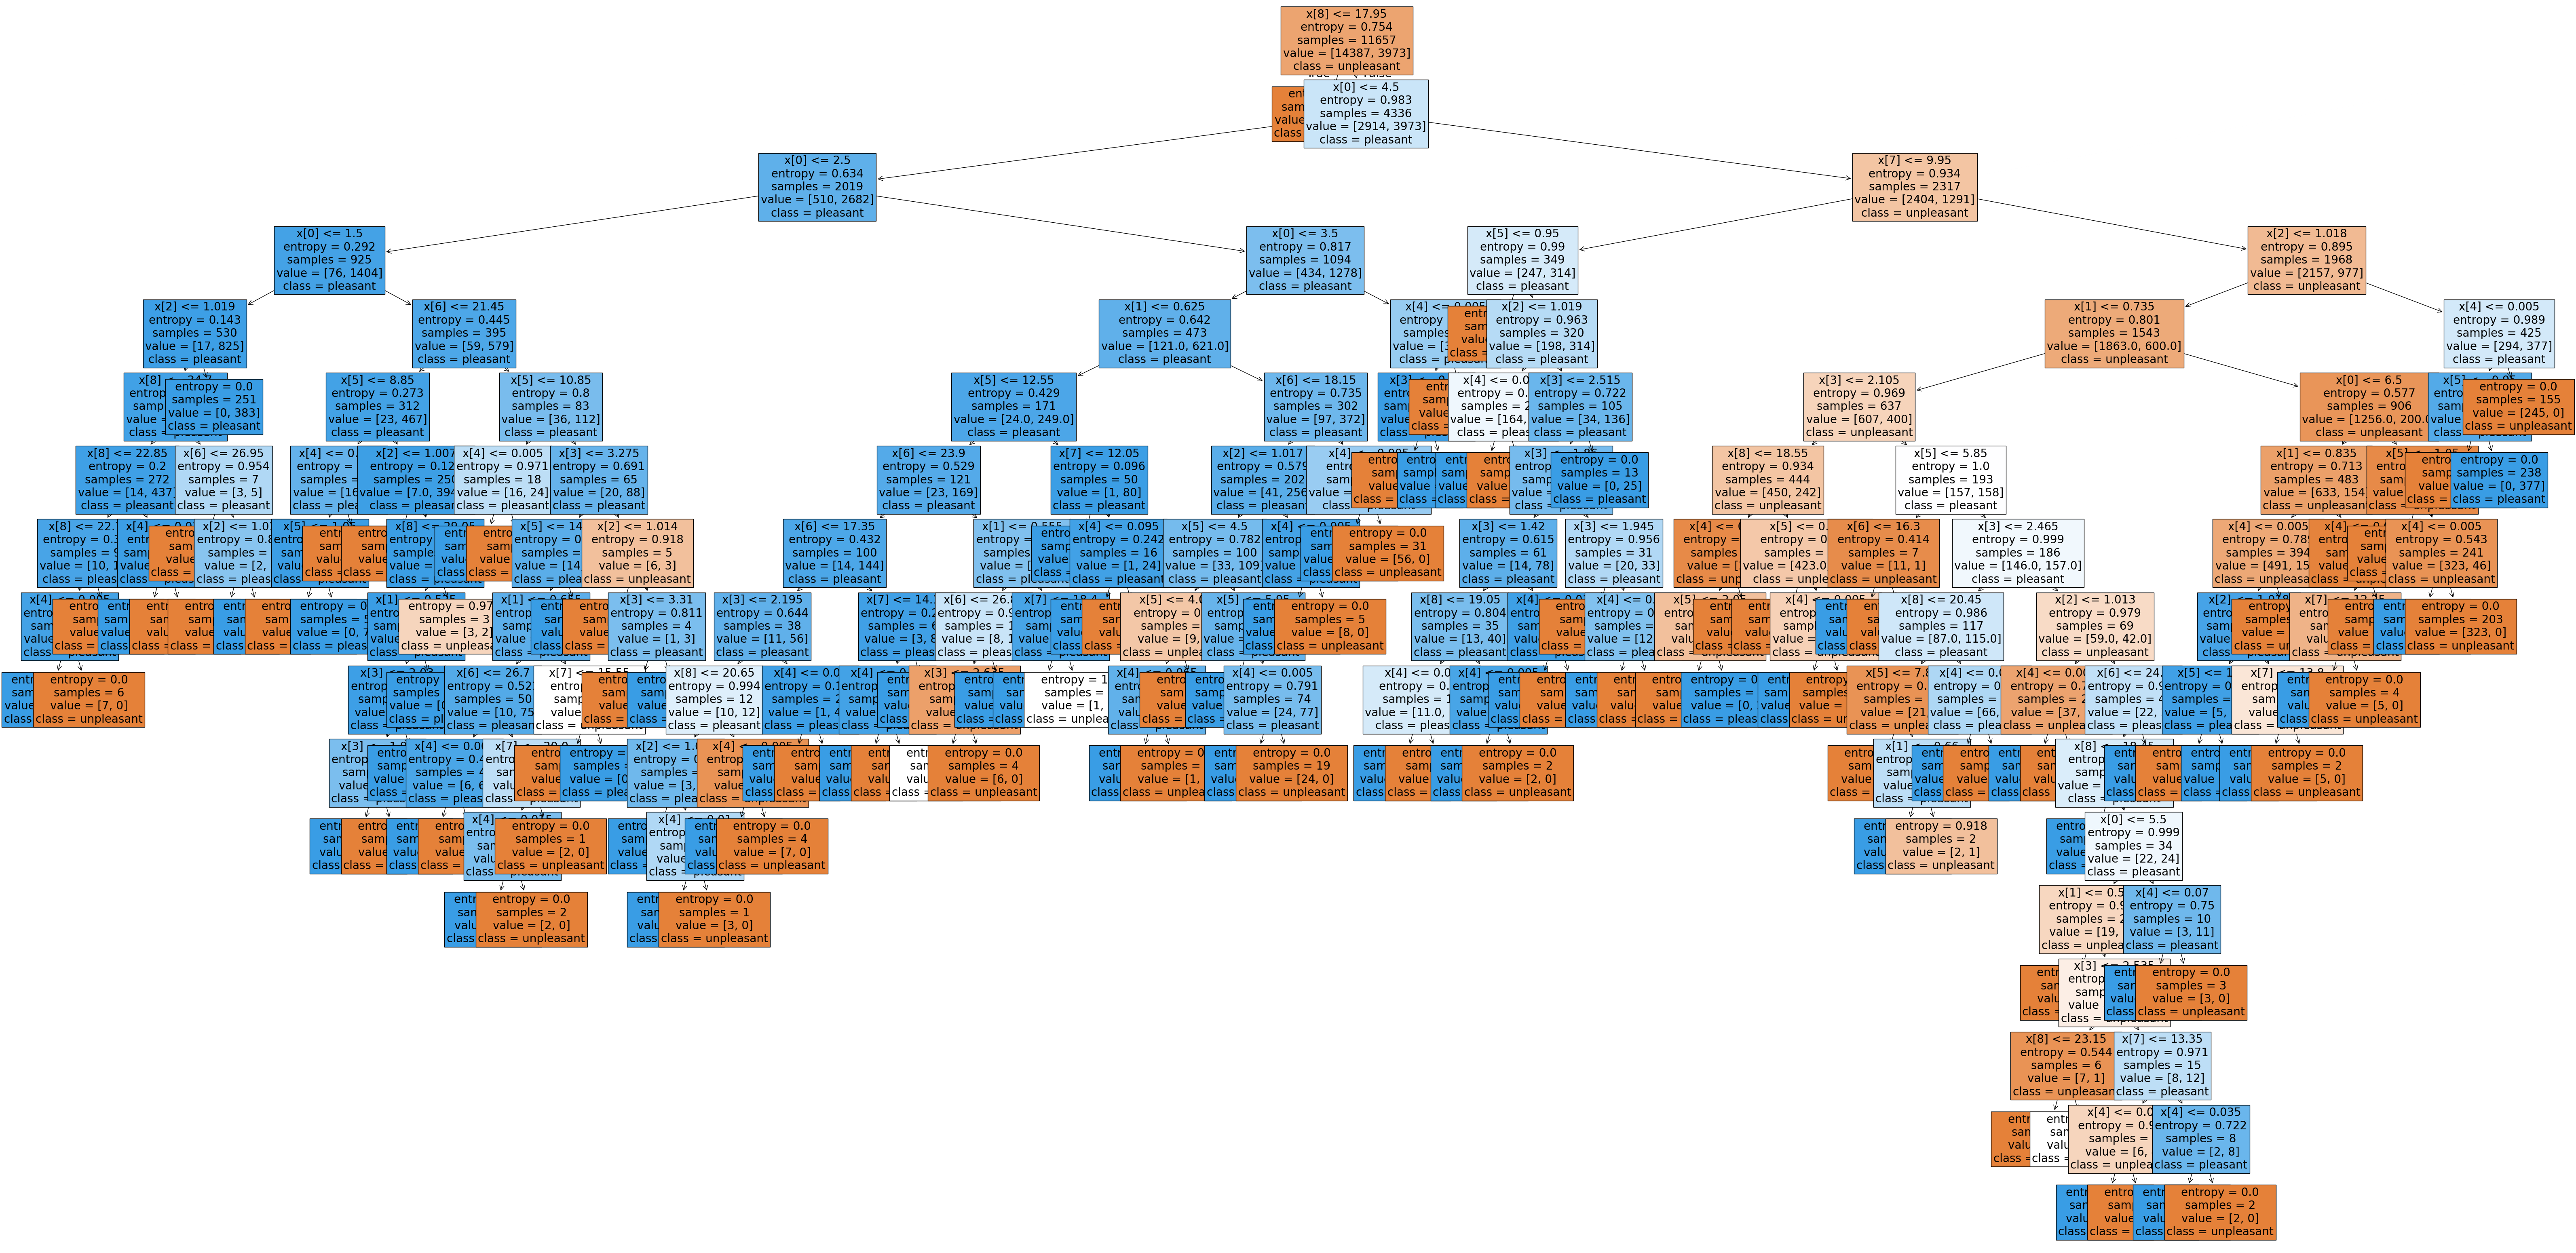

In [180]:
# Plotting the tree of the single weather station dataset

types = {0:'unpleasant', 1:'pleasant'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf2.estimators_[15], fontsize = 20, class_names=types, filled=True);
fig.savefig("Hyperparameter Randome Forest_DUSSELDORF.png")

When comparing the Random Forest models from task 2.3 to the current task 2.4 there isn't much to compare besides Accuracy. The Random Forest 1960s accuracy in task 2.3 was 0.603 while the Random Forest for DUSSELDORF in task 2.3 was 1.0 accuracy. In this task, our Random Forest 1960 Hyperparameter accuracy was low at 0.487 however, our Rnadom Forest for DUSSELDORF with the hyperparameters still had an accuracy of 1.0. The example script did not request that a Important Features be run in this current task. However, I did complete the important features for both the Random Forest and the DUSSELDORF datasets. For the Random Forest it appears that the top important features are temp_max and temp_mean, and for the DUSSELDORF Random Forest the top important features are precipitation, temp_max, and temp_mean. When considering the best parameters for both dataset they were the same at 'criterion': 'gini', 'max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split', 'n_estimators', with various values attached.

### 5. Bayesian search on Deep Learning Data

#### Importing Libraries and Data

In [397]:
from sklearn.preprocessing import LabelEncoder
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

##### I ran into some issues with the libraries.
##### from keras.utils import np_utils did not work and had to be changed to from tensorflow.keras.utils import to_categorical
##### from keras.wrappers.scikit_learn import KerasClassifier didn't work so I had to install scikeras through my command prompt and use from scikeras.wrappers import KerasClassifier
##### from bayes_opt import BayesianOptimization didn't work and I had to install bayesian-optimization through my command prompt and re run the code.
##### The recommendation to install these libraries was not prefaced in the task reading.

In [439]:
# Importing Cleaned Climate Data from Keras task where I ran a RNN (2.2)

Crnn = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning\ClimateWins\Unsupervised Learning\ML2_2.2_Climatewins_cleaned.csv')

In [441]:
# Importing Cleaned Pleasant Data from Keras task where I ran a RNN (2.2)

Prnn = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning\ClimateWins\Unsupervised Learning\ML2_2.2_Pleasant_cleaned.csv')

##### These two datasets were previously cleaned. GDANSK, ROMA and TOURS weather stations were removed. The columns for wind_speed and snow_depth have been removed as they weren't consistent over all the remaining weather stations. KASSEL, MUNCHENB AND STOCKHOLM were missing observations that were duplicated from their closest weather station neighbor (LJUBLJANA, SONNBLICK, and OSLO).

In [444]:
# Create an 'X' matrix
# For this coding X and y will be changed to R and rr to prevent confusion with the X matrix above.

R = Crnn
rr = Prnn

In [446]:
R

Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0               0                  7            0.85          1.0180   
1               1                  6            0.84          1.0180   
2               2                  8            0.90          1.0180   
3               3                  3            0.92          1.0180   
4               4                  6            0.95          1.0180   
...           ...                ...             ...             ...   
22945       22945                  1            0.79          1.0248   
22946       22946                  6            0.77          1.0244   
22947       22947                  4            0.76          1.0227   
22948       22948                  5            0.80          1.0212   
22949       22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                  6.5             0.8            10.9                     1   
1                  6.1             3.3            10.1                     6   
2                  8.5             5.1             9.9                     6   
3                  6.3             3.8            10.6                     8   
4                  3.0            -0.7             6.0                     8   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0                   0.81             1.0195                       0.88   
1                   0.84             1.0172                       0.25   
2                   0.77             1.0179                       0.67   
3                   0.93             1.0268                       0.25   
4                   0.99             1.0286                       0.25   
...                  ...                ...                        ...   
22945               0.68             1.0278                       1.57   
22946               0.68             1.0295                       1.57   
22947               0.68             1.0278                       1.57   
22948               0.68             1.0238                       1.57   
22949               0.68             1.0235                       1.57   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                        0.00                7.0                 3.7   
1                        0.00                0.0                 2.9   
2                        0.00                3.5                 3.1   
3                        0.00                0.0                 2.0   
4                        0.06                0.0                 2.0   
...                

In [448]:
rr

Unnamed: 0  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0               0                       0                          0   
1               1                       0                          0   
2               2                       0                          0   
3               3                       0                          0   
4               4                       0                          0   
...           ...                     ...                        ...   
22945       22945                       0                          0   
22946       22946                       0                          0   
22947       22947                       0                          0   
22948       22948                       0                          0   
22949       22949                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1       

In [450]:
# Drop the Unnamed: 0 from R and rr

R = R.drop(columns=['Unnamed: 0'])

In [452]:
# Drop the Unnamed: 0 from rr

rr = rr.drop(columns=['Unnamed: 0'])

In [454]:
R.shape

(22950, 135)

In [456]:
rr.shape

(22950, 15)

In [458]:
R = np.array(R.iloc[:,R.columns!=135])
rr = np.array(rr)

In [460]:
R

array([[7.    , 0.85  , 1.018 , ..., 8.    , 1.0304, 0.98  ],
       [6.    , 0.84  , 1.018 , ..., 6.    , 1.0292, 0.62  ],
       [8.    , 0.9   , 1.018 , ..., 8.    , 1.032 , 0.69  ],
       ...,
       [4.    , 0.76  , 1.0227, ..., 3.    , 1.0263, 0.85  ],
       [5.    , 0.8   , 1.0212, ..., 3.    , 1.0263, 0.94  ],
       [5.    , 0.84  , 1.0193, ..., 3.    , 1.0263, 0.97  ]])

In [464]:
type_of_target(R)

'continuous-multioutput'

##### I had to readjust the Function as I ran into problems. lr is no longer the appropriate abbreviation, you now have to type in learning_rate = learning_rate. The original code held model.add(Dense(num_classes, activation='softmax')) I had to change to model.add(Dense(15, activation='sigmoid')). I also had to use the unique code to determin what my yy looked like as the code had an issue with the values going above 9. Further investigation states the y contains NaN. But when inspecting yy_train, no NaN was given.

In [462]:
rr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [466]:
type_of_target(rr)

'multilabel-indicator'

In [468]:
R = R.reshape(-1,15,9)

In [470]:
R

array([[[ 7.0000e+00,  8.5000e-01,  1.0180e+00, ...,  6.5000e+00,
          8.0000e-01,  1.0900e+01],
        [ 1.0000e+00,  8.1000e-01,  1.0195e+00, ...,  3.7000e+00,
         -9.0000e-01,  7.9000e+00],
        [ 4.0000e+00,  6.7000e-01,  1.0170e+00, ...,  2.4000e+00,
         -4.0000e-01,  5.1000e+00],
        ...,
        [ 1.0304e+00,  4.8000e-01,  1.0000e-02, ..., -3.2000e+00,
          5.0000e+00,  1.0114e+00],
        [ 5.0000e-02,  3.2000e-01,  0.0000e+00, ...,  5.0000e+00,
          8.8000e-01,  1.0003e+00],
        [ 4.5000e-01,  3.4000e-01,  4.7000e+00, ...,  8.0000e+00,
          1.0304e+00,  9.8000e-01]],

       [[ 6.0000e+00,  8.4000e-01,  1.0180e+00, ...,  6.1000e+00,
          3.3000e+00,  1.0100e+01],
        [ 6.0000e+00,  8.4000e-01,  1.0172e+00, ...,  2.9000e+00,
          2.2000e+00,  4.4000e+00],
        [ 4.0000e+00,  6.7000e-01,  1.0170e+00, ...,  2.3000e+00,
          1.4000e+00,  3.1000e+00],
        ...,
        [ 1.0292e+00,  2.1000e-01,  6.1000e-01, ..., -

In [472]:
type_of_target(R)

'unknown'

In [474]:
print("Original R shape:", R.shape)
print("Original rr shape:", rr.shape)

Original R shape: (22950, 15, 9)
Original rr shape: (22950, 15)


#### Splitting Data, Running Bayesian Search

In [477]:
# Splitting the data into training/testing

R_train, R_test, rr_train, rr_test = train_test_split(R, rr, test_size=0.2, random_state=42)

In [479]:
from sklearn.utils.multiclass import type_of_target
type_of_target(rr_train)

'multilabel-indicator'

In [481]:
# Use argmax to get rid of one-hot encoding and supply the numerical value.

rr_train = np.argmax(rr_train, axis = 1)
print(rr_train.shape)
rr_train

(18360,)


array([1, 0, 2, ..., 1, 9, 1], dtype=int64)

In [483]:
type_of_target(rr_train)

'multiclass'

In [485]:
timesteps = len(R_train[0])
input_dim = len(R_train[0][0])
n_classes = 6 #_count_classes(R_train)
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [487]:
# Create function for RNN

def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate): 
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    
    neurons = round(neurons)
    kernel = round(kernel)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    def rnn_model():
        model = Sequential()
        model.add(Conv1D(neurons, kernel_size=kernel,activation=activation, input_shape=(timesteps, input_dim)))
        #model.add(Conv1D(32, kernel_size=1,activation='relu', input_shape=(timesteps, input_dim)))
        
        if normalization > 0.5:
            model.add(BatchNormalization())
        for i in range(layers1):
            model.add(Dense(neurons, activation=activation)) #(neurons, activation=activation))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(15, activation='sigmoid')) #sigmoid softmax
        #model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) #categorical_crossentropy
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #categorical_crossentropy
        return model
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    nn = KerasClassifier(build_fn=rnn_model, epochs=epochs, batch_size=batch_size, verbose=2)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, R_train, rr_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [489]:
start = time.time()
params ={
    'neurons': (10, 100),
    'kernel': (1, 3),
    'activation':(0, 9), #9
    'optimizer':(0,7), #7
    'learning_rate':(0.01, 1),
    'batch_size': (200, 1000), #(10, 50), #
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_opt = BayesianOptimization(bay_area, params, random_state=42)
nn_opt.maximize(init_points=15, n_iter=4) #25
print('Search took %s minutes' % ((time.time() - start)/60))

|   iter    |  target   |  neurons  |  kernel   | activa... | optimizer | learni... | batch_... |  epochs   |  layers1  |  layers2  | normal... |  dropout  | dropou... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/25
46/46 - 1s - 16ms/step - accuracy: 0.6433 - loss: nan
Epoch 2/25
46/46 - 0s - 4ms/step - accuracy: 0.6433 - loss: nan
Epoch 3/25
46/46 - 0s - 4ms/step - accuracy: 0.6433 - loss: nan
Epoch 4/25
46/46 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 5/25
46/46 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 6/25
46/46 - 0s - 4ms/step - accuracy: 0.6433 - loss: nan
Epoch 7/25
46/46 - 0s - 4ms/step - accuracy: 0.6433 - loss: nan
Epoch 8/25
46/46 - 0s - 4ms/step - accuracy: 0.6433 - loss: nan
Epoch 9/25
46/46 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 10/25
46/46 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 11/25
46/46 

ValueError: Input y contains NaN.

In [491]:
# Inspecting the rr_train 

print(np.unique(rr_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]


##### I had to readjust the Function as I ran into problems. lr is no longer the accepted, you now have to type in learning_rate = learning_rate. The original code held model.add(Dense(num_classes, activation='softmax')) I had to change to model.add(Dense(15, activation='sigmoid')). I also had to use the unique code to determin what my yy looked like as the code had an issue with the values going above 9. Further investigation states the y contains NaN. But when inspecting yy_train, no NaN was given.

In [493]:
optimum = nn_opt.max['params']
learning_rate = optimum['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
optimum['activation'] = activationL[round(optimum['activation'])]
optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
             'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
optimum['optimizer'] = optimizerD[optimizerL[round(optimum['optimizer'])]]
optimum

{'neurons': 44,
 'kernel': 2.9014286128198323,
 'activation': 'exponential',
 'optimizer': <keras.src.optimizers.adagrad.Adagrad at 0x1c82b51d310>,
 'learning_rate': 0.16445845403801215,
 'batch_size': 325,
 'epochs': 25,
 'layers1': 3,
 'layers2': 2,
 'normalization': 0.7080725777960455,
 'dropout': 0.020584494295802447,
 'dropout_rate': 0.29097295564859826}

###### Update your CNN/RNN model to match the layers and setup in your optimum setup. You can copy the for loops and if statements from the optimization function. Feed it the optimized hyperparameters and create a confusion matrix of the results.
##### Hint: You’ll need to put your y_test set back into a one-hot configuration using Code Snippet 2 after the task instructions.
##### Code Snippet 2: 
#Turn y_test into one-hot format
ty=np_utils.to_categorical(y_test)
print(ty)

---- Below is running the RNN again with the details above

#### Re-running RNN and Creating Confusion Matrix

In [495]:
# Looking at the rr_train current target and uniquiness

type_of_target(rr_train)

'multiclass'

In [497]:
print(np.unique(rr_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]


In [507]:
rr_train

array([1, 0, 2, ..., 1, 9, 1], dtype=int64)

In [499]:
# # Looking at the rr_test current target and uniquiness

type_of_target(rr_test)

'multilabel-indicator'

In [501]:
print(np.unique(rr_test))

[0 1]


In [505]:
rr_test

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1]], dtype=int64)

In [525]:
# The number of classes is 2 for a binary problem
num_classes = 15

# This function converts the 1D integer array to a 2D one-hot array
rr_test_one_hot = to_categorical(rr_test, num_classes=num_classes)

print("Original shape:", rr_test.shape)
print("One-hot shape:", rr_test_one_hot.shape)
print("One-hot data example:")
print(rr_test_one_hot[:5]) # Prints the first 5 rows

Original shape: (4590, 15)
One-hot shape: (4590, 15, 15)
One-hot data example:
[[[0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]]


In [527]:
num_classes = 15

# This converts the 1D multiclass array to a 2D one-hot array
rr_train_one_hot = to_categorical(rr_train, num_classes=num_classes)

# Check the new shape
print("Shape of one-hot data:", rr_train_one_hot.shape)
print("Unique values of one-hot data:", np.unique(rr_train_one_hot))

Shape of one-hot data: (18360, 15)
Unique values of one-hot data: [0. 1.]


In [543]:
activities = [
    'BASEL_pleasant_weather',        
    'BELGRADE_pleasant_weather',
    'BUDAPEST_pleasant_weather',
    'DEBILT_pleasant_weather',
    'DUSSELDORF_pleasant_weather',
    'HEATHROW_pleasant_weather',
    'KASSEL_pleasant_weather',
    'LJUBLJANA_pleasant_weather',
    'MAASTRICHT_pleasant_weather',
    'MADRID_pleasant_weather',
    'MUNCHENB_pleasant_weather',
    'OSLO_pleasant_weather',
    'SONNBLICK_pleasant_weather',
    'STOCKHOLM_pleasant_weather',
    'VALENTIA_pleasant_weather'
]

In [529]:
# Need to add learning rate to the optimizer type??

epochs = 25
batch_size = 325
n_hidden = 32

timesteps = len(R_train[0])
input_dim = len(R_train[0][0])
n_classes = 15 #_count_classes(rr_train)
layers1 = 3
layers2 = 2
activation = 'exponential'
kernel = 3
neurons = 44
normalization = 0.7080725777960455
dropout = 0.020584494295802447
dropout_rate = 0.29097295564859826
optimizer = 'Adagrad'

model = Sequential()
model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))
if normalization > 0.5:
    model.add(BatchNormalization())
for i in range(layers1):
    model.add(Dense(neurons, activation=activation))
if dropout > 0.5:
    model.add(Dropout(dropout_rate, seed=123))
for i in range(layers2):
    model.add(Dense(neurons, activation=activation))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) #softmax sigmoid
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #binary_crossentropy
model.summary()

Model: "sequential_172"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_168 (Conv1D)                  │ (None, 13, 44)              │           1,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_94               │ (None, 13, 44)              │             176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_854 (Dense)                    │ (None, 13, 44)              │           1,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_855 (Dense)                    │ (None, 13, 44)              │           1,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_856 (Dense)                    │ (None, 13, 44)              │           1,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_857 (Dense)                    │ (None, 13, 44)              │           1,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_858 (Dense)                    │ (None, 13, 44)              │           1,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_164 (MaxPooling1D)     │ (None, 6, 44)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_164 (Flatten)                │ (None, 264)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_859 (Dense)                    │ (None, 15)                  │           3,975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,283 (59.70 KB)

 Trainable params: 15,195 (59.36 KB)

 Non-trainable params: 88 (352.00 B)

In [531]:
model.fit(R_train, rr_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/25
57/57 - 1s - 13ms/step - accuracy: 0.6352 - loss: nan
Epoch 2/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 3/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 4/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 5/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 6/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 7/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 8/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 9/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 10/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 11/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 12/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 13/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 14/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 15/25
57/57 - 0s - 3ms/step - accuracy: 0.6433 - loss: nan
Epoch 16/25
57/57 - 0s - 3ms/step

In [561]:
def confusion_matrix(rr_true, rr_pred):
    rr_true = pd.Series([activities[rr] for rr in np.argmax(rr_true, axis=1)])
    rr_pred = pd.Series([activities[rr] for rr in np.argmax(rr_pred, axis=1)])

    return pd.crosstab(rr_true, rr_pred, rownames=['TRUE'], colnames=['PRED'])

In [563]:
# Evaluate

pd.set_option('display.max_rows', 15)
print(confusion_matrix(rr_test, model.predict(R_test)))

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
PRED                         BASEL_pleasant_weather
TRUE                                               
BASEL_pleasant_weather                         2955
BELGRADE_pleasant_weather                       879
BUDAPEST_pleasant_weather                       162
DEBILT_pleasant_weather                          64
DUSSELDORF_pleasant_weather                      25
HEATHROW_pleasant_weather                        67
KASSEL_pleasant_weather                           9
LJUBLJANA_pleasant_weather                       46
MAASTRICHT_pleasant_weather                       7
MADRID_pleasant_weather                         360
MUNCHENB_pleasant_weather                         8
OSLO_pleasant_weather                             4
STOCKHOLM_pleasant_weather                        3
VALENTIA_pleasant_weather                         1


When comparing the RNN created in task 2.2 to this task 2.4 there are some differences.

In task 2.2 the 3rd RNN sequential model was yielding 10:
Total params: 9,549 (37.30 KB)
Trainable params: 9,549 (37.30 KB)
Non-trainable params: 0 (0.00 B)

In this current task 2.4 our sequential model was yielding 172:
Total params: 15,283 (59.70 KB)
Trainable params: 15,195 (59.36 KB)
Non-trainable params: 88 (352.00 B)

We can see there's a large different in params. In task 2.2 the model.fit had an epoch of 30 and an accuracy that started at 0.82 and increased to 0.96. In this task the model.fit had an epoch of 25 and the accuracy started at 0.63 and only increase to 0.64. That wasn't a very good improvement using the Bayesian Search.
There were some issues with the bayesian search indicating NaN were present when non were showing. This indicates that the algorithms isn't running properly but there are no NaN to be found. 

### 6. Export

In [2]:
# Exporting Random Forest 1960s Climate dataset (original)

climate_1960s.to_csv = (os.path.join(path,'ClimateWins', 'Unsupervised Learning', 'RandomForest1960sClimate.csv'))

NameError: name 'os' is not defined

In [569]:
# Exporting Random Forest 1960s Pleasant dataset (original)

pleasant_1960s.to_csv = (os.path.join(path,'ClimateWins', 'Unsupervised Learning', 'RandomForest1960sPleasant.cvs'))

In [ ]:
------

In [571]:
# Exporting Random Forest DUSSELDORF Climate dataset (original)

climate_dusseldorf.to_csv = (os.path.join(path,'ClimateWins', 'Unsupervised Learning', 'RandomForestDUSSELDORFClimate.csv'))

In [575]:
# Exporting Random Forest DUSSELDORF Pleasant dataset (original)

pleasant_dusseldorf.to_csv = (os.path.join(path,'ClimateWins', 'Unsupervised Learning', 'RandomForestDUSSELDORFPleasant.csv'))